## Observations and Insights

- Based on the number of mice at timepoint 45, Capomulin is the most promising, with the greatest number of mice surviving.
- Of the four most promising regimens (based on number of mice at timepoint 45) Capomulin and Ramicane had the lowest mean final tumor volume (mm3), but had a wider spreads of final tumor volumes than Naftisol and Zoniferol, which had higher mean tumor volumes.
- There is a positive correlation between mouse weight and average tumor size.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Import and read in data
mouse_metadata_location = "Resources/Mouse_metadata.csv"
study_results_location = "Resources/Study_results.csv"

mouse_metadata_raw_df = pd.read_csv(mouse_metadata_location)
study_results_raw_df = pd.read_csv(study_results_location)

# Merge dataframes
mouse_and_study_data_raw_df = mouse_metadata_raw_df.merge(right=study_results_raw_df, on=["Mouse ID"])
mouse_and_study_data_raw_df

# Sort by Mouse ID
mouse_and_study_data_raw_df = mouse_and_study_data_raw_df.sort_values(["Mouse ID", "Timepoint"])
mouse_and_study_data_raw_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Check number of mice in dataframe
mouse_and_study_data_raw_df["Mouse ID"].nunique()

249

In [4]:
# Find duplicate mouse at timestamp
mouse_and_study_data_duplicates=mouse_and_study_data_raw_df[mouse_and_study_data_raw_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
mouse_and_study_data_duplicates

# Sort duplicaes by Timepoint
mouse_and_study_data_duplicates = mouse_and_study_data_duplicates.sort_values(["Timepoint"])
mouse_and_study_data_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
mouse_to_remove = mouse_and_study_data_duplicates["Mouse ID"].unique()[0]
mouse_to_remove
mouse_and_study_data_clean_df = mouse_and_study_data_raw_df.loc[mouse_and_study_data_raw_df["Mouse ID"] != mouse_to_remove, :]
mouse_and_study_data_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Check number of mice in clean dataframe
mouse_and_study_data_clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate summary statistics for each Drug Regimen (method 1)
drug_regimens = mouse_and_study_data_clean_df["Drug Regimen"].unique()
summary_statistics = []

for drug_regimen in drug_regimens:
    mean = mouse_and_study_data_clean_df[mouse_and_study_data_clean_df["Drug Regimen"]==drug_regimen]["Tumor Volume (mm3)"].mean()
    median = mouse_and_study_data_clean_df[mouse_and_study_data_clean_df["Drug Regimen"]==drug_regimen]["Tumor Volume (mm3)"].median()
    variance = mouse_and_study_data_clean_df[mouse_and_study_data_clean_df["Drug Regimen"]==drug_regimen]["Tumor Volume (mm3)"].var()
    std_dev = mouse_and_study_data_clean_df[mouse_and_study_data_clean_df["Drug Regimen"]==drug_regimen]["Tumor Volume (mm3)"].std()
    sem = mouse_and_study_data_clean_df[mouse_and_study_data_clean_df["Drug Regimen"]==drug_regimen]["Tumor Volume (mm3)"].sem()

    statistics={"Drug Regimen" : drug_regimen, "Mean" : mean, "Median" : median, "Variance" : variance, "Standard Deviation" : std_dev, "SEM" : sem}

    summary_statistics.append(statistics)

summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df = summary_statistics_df.set_index(["Drug Regimen"])
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate summary statistics for each Drug Regimen (method 2)
mouse_and_study_data_clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(func=["mean", "median", "var", "std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [9]:
# Get x-axis of Timepoint
timepoint = mouse_and_study_data_clean_df.sort_values(["Timepoint"], ascending=True)
timepoint = timepoint["Timepoint"].unique()

# Generate y-axis of Number of Mice per Drug Regimen per Timepoint
drug_regimens_to_plot = mouse_and_study_data_clean_df.sort_values(["Drug Regimen"], ascending=True)
drug_regimens_to_plot = drug_regimens_to_plot["Drug Regimen"].unique()

all_drug_regimens_mice = []

for drug_regimen_to_plot in drug_regimens_to_plot:

    mice_at_each_timepoint = []

    for point in timepoint:

        selected_drug_regimen_df = mouse_and_study_data_clean_df.loc[mouse_and_study_data_clean_df["Drug Regimen"]==drug_regimen_to_plot, :]

        time = selected_drug_regimen_df["Timepoint"] == point

        selected_timepoint_df = selected_drug_regimen_df.loc[time, :]

        mice_at_selected_timepoint = selected_timepoint_df["Mouse ID"].nunique()

        mice_at_each_timepoint.append(mice_at_selected_timepoint)

    locals()["mice_in_" + drug_regimen_to_plot] = mice_at_each_timepoint
    print(f"mice_in_{drug_regimen_to_plot}")
    all_drug_regimens_mice.append(locals()["mice_in_" + drug_regimen_to_plot])

mice_in_Capomulin
mice_in_Ceftamin
mice_in_Infubinol
mice_in_Ketapril
mice_in_Naftisol
mice_in_Placebo
mice_in_Propriva
mice_in_Ramicane
mice_in_Stelasyn
mice_in_Zoniferol


[]

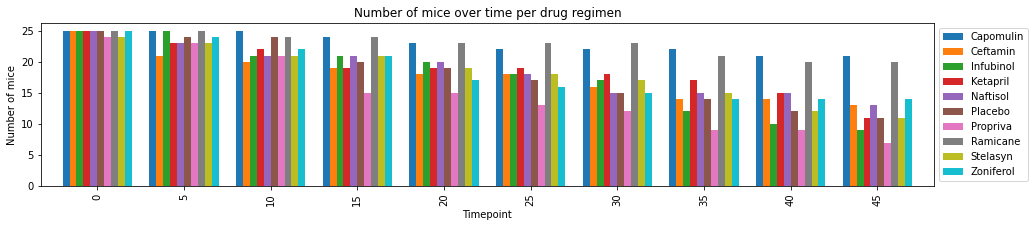

In [10]:
# Bar plot showing number of Mice per Drug Regimen per Timepoint
mice_vs_time_df = (pd.DataFrame(all_drug_regimens_mice, index=drug_regimens_to_plot, columns=timepoint)
                .swapaxes("index", "columns"))
mice_vs_time_bar = mice_vs_time_df.plot.bar(figsize=(16, 3), width=.8)
mice_vs_time_bar.set(title="Number of mice over time per drug regimen", xlabel="Timepoint", ylabel="Number of mice")
mice_vs_time_bar.legend(bbox_to_anchor=(1.0, 1.0))
mice_vs_time_bar.plot()

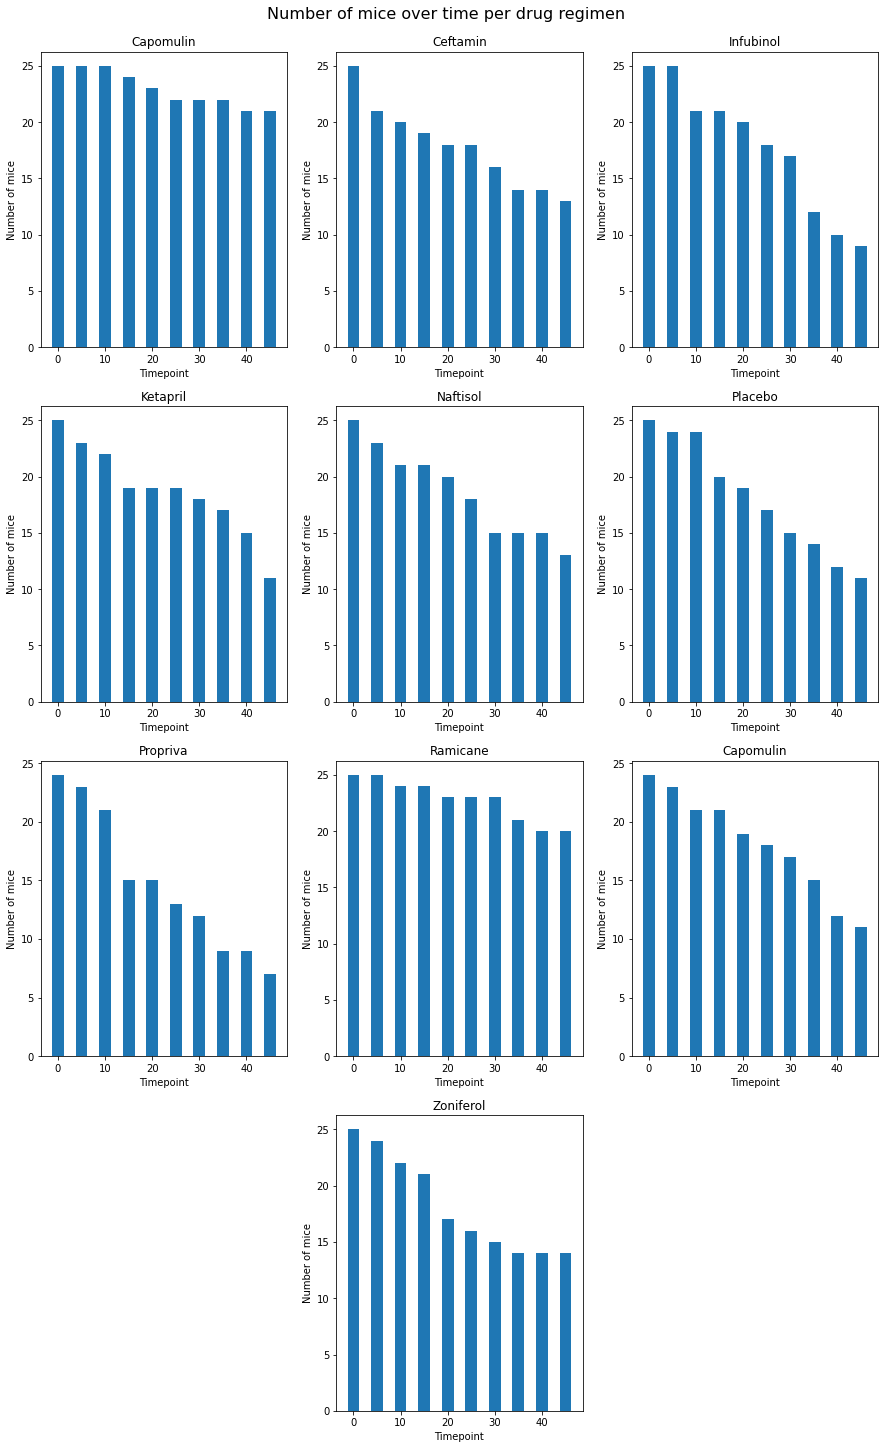

In [11]:
# Series of bar plots showing number of Mice per Drug Regimen per Timepoint

mice_vs_time_bar_full_fig = plt.figure(figsize=(15,25))
mice_vs_time_bar_full_fig.suptitle(t="Number of mice over time per drug regimen", y=.905, size=16)

plt.subplot(4, 3, 1)
plt.bar(x=timepoint, height=mice_in_Capomulin, width=2.5)
plt.title("Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 2)
plt.bar(x=timepoint, height=mice_in_Ceftamin, width=2.5)
plt.title("Ceftamin")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 3)
plt.bar(x=timepoint, height=mice_in_Infubinol, width=2.5)
plt.title("Infubinol")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 4)
plt.bar(x=timepoint, height=mice_in_Ketapril, width=2.5)
plt.title("Ketapril")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 5)
plt.bar(x=timepoint, height=mice_in_Naftisol, width=2.5)
plt.title("Naftisol")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 6)
plt.bar(x=timepoint, height=mice_in_Placebo, width=2.5)
plt.title("Placebo")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 7)
plt.bar(x=timepoint, height=mice_in_Propriva, width=2.5)
plt.title("Propriva")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 8)
plt.bar(x=timepoint, height=mice_in_Ramicane, width=2.5)
plt.title("Ramicane")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 9)
plt.bar(x=timepoint, height=mice_in_Stelasyn, width=2.5)
plt.title("Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.subplot(4, 3, 11)
plt.bar(x=timepoint, height=mice_in_Zoniferol, width=2.5)
plt.title("Zoniferol")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")

plt.show()

## Pie Plots

In [12]:
# Get number of female mice
female_mice = mouse_and_study_data_clean_df["Sex"].loc[mouse_and_study_data_clean_df["Sex"]=="Female"].count()

# Get number of male mice
male_mice = mouse_and_study_data_clean_df["Sex"].loc[mouse_and_study_data_clean_df["Sex"]=="Male"].count()

# Create dataframe that shows all Mice broken down by Sex
all_mice = {"Number of Mice" : [female_mice, male_mice]}
all_mice_df = pd.DataFrame(all_mice, index=["Female", "Male"])
all_mice_df

,Number of Mice
Female,922
Male,958


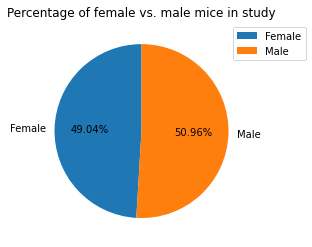

In [13]:
# Create pie plot of Female vs. Male mice in study using pandas
all_mice_pie = all_mice_df.plot.pie(y="Number of Mice", autopct="%.2f%%", startangle=90, rotatelabels=False)
all_mice_pie.set(title="Percentage of female vs. male mice in study")
all_mice_pie.set_ylabel(None)
all_mice_pie.legend(bbox_to_anchor=(.9, 1.0))
plt.show()

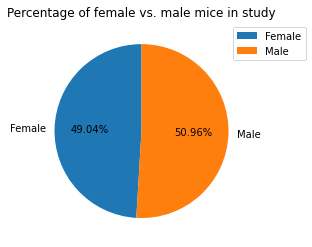

In [14]:
# Create pie plot of Female vs. Male mice in study using Matplotlib
plt.pie(x=[female_mice, male_mice], labels=["Female", "Male"], startangle=90, autopct="%.2f%%")
plt.legend(bbox_to_anchor=(.9, 1.0))
plt.title("Percentage of female vs. male mice in study")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
timepoint_45_tumor_volume_df = (mouse_and_study_data_clean_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
                                .loc[mouse_and_study_data_clean_df["Timepoint"]==45])
timepoint_45_tumor_volume_df = timepoint_45_tumor_volume_df.set_index("Drug Regimen").sort_index(ascending=True)
timepoint_45_tumor_volume_df
final_tumor_volume_most_promising_df = timepoint_45_tumor_volume_df.loc[["Capomulin", "Naftisol", "Ramicane", "Zoniferol"]]

In [16]:
# Isolate final tumor volumes for Capomulin
final_tumor_volume_Capomulin_df = final_tumor_volume_most_promising_df.loc["Capomulin"]
final_tumor_volume_Capomulin = final_tumor_volume_Capomulin_df["Tumor Volume (mm3)"]

# Find first quartile
q1_Capomulin = np.quantile(final_tumor_volume_Capomulin, q=[.25])[0]

# Find third quartile
q3_Capomulin = np.quantile(final_tumor_volume_Capomulin, q=[.75])[0]

# Find IQR
iqr_Capomulin = round(q3_Capomulin - q1_Capomulin, 6)

# Find lower bound for determining outliers
minimum_Capomulin = round(q1_Capomulin - (1.5 * iqr_Capomulin), 6)

# Find upper bound for determining outliers
maximum_Capomulin = round(q3_Capomulin + (1.5 * iqr_Capomulin), 6)

# Find outliers
outliers_Capomulin = []

for value in final_tumor_volume_Capomulin:
    if value < minimum_Capomulin:
        outliers_Capomulin.append(value)
    elif value > maximum_Capomulin:
        outliers_Capomulin.append(value)

if outliers_Capomulin == []:
    outliers_Capomulin = "None"

# Print findings
print(f"For Final Tumor Volume (mm3) in Drug Regimen Capomulin, the IQR is {iqr_Capomulin}.")
print(f"Any tumor volumes lower than {minimum_Capomulin} or higher than {maximum_Capomulin}, are possible outliers.")
print(f"Possible outliers: {outliers_Capomulin}")

For Final Tumor Volume (mm3) in Drug Regimen Capomulin, the IQR is 7.781863.
Any tumor volumes lower than 20.704562 or higher than 51.832015, are possible outliers.
Possible outliers: None


In [17]:
# Isolate final tumor volumes for Naftisol
final_tumor_volume_Naftisol_df = final_tumor_volume_most_promising_df.loc["Naftisol"]
final_tumor_volume_Naftisol = final_tumor_volume_Naftisol_df["Tumor Volume (mm3)"]

# Find first quartile
q1_Naftisol = np.quantile(final_tumor_volume_Naftisol, q=[.25])[0]

# Find third quartile
q3_Naftisol = np.quantile(final_tumor_volume_Naftisol, q=[.75])[0]

# Find IQR
iqr_Naftisol = round(q3_Naftisol - q1_Naftisol, 6)

# Find lower bound for determining outliers
minimum_Naftisol = round(q1_Naftisol - (1.5 * iqr_Naftisol), 6)

# Find upper bound for determining outliers
maximum_Naftisol = round(q3_Naftisol + (1.5 * iqr_Naftisol), 6)

# Find outliers
outliers_Naftisol = []

for value in final_tumor_volume_Naftisol:
    if value < minimum_Naftisol:
        outliers_Naftisol.append(value)
    elif value > maximum_Naftisol:
        outliers_Naftisol.append(value)

if outliers_Naftisol == []:
    outliers_Naftisol = "None"

# Print findings
print(f"For Final Tumor Volume (mm3) in Drug Regimen Naftisol, the IQR is {iqr_Naftisol}.")
print(f"Any tumor volumes lower than {minimum_Naftisol} or higher than {maximum_Naftisol}, are possible outliers.")
print(f"Possible outliers: {outliers_Naftisol}")

For Final Tumor Volume (mm3) in Drug Regimen Naftisol, the IQR is 9.921204.
Any tumor volumes lower than 49.064834 or higher than 88.749651, are possible outliers.
Possible outliers: None


In [18]:
# Isolate final tumor volumes for Ramicane
final_tumor_volume_Ramicane_df = final_tumor_volume_most_promising_df.loc["Ramicane"]
final_tumor_volume_Ramicane = final_tumor_volume_Ramicane_df["Tumor Volume (mm3)"]

# Find first quartile
q1_Ramicane = np.quantile(final_tumor_volume_Ramicane, q=[.25])[0]

# Find third quartile
q3_Ramicane = np.quantile(final_tumor_volume_Ramicane, q=[.75])[0]

# Find IQR
iqr_Ramicane = round(q3_Ramicane - q1_Ramicane, 6)

# Find lower bound for determining outliers
minimum_Ramicane = round(q1_Ramicane - (1.5 * iqr_Ramicane), 6)

# Find upper bound for determining outliers
maximum_Ramicane = round(q3_Ramicane + (1.5 * iqr_Ramicane), 6)

# Find outliers
outliers_Ramicane = []

for value in final_tumor_volume_Ramicane:
    if value < minimum_Ramicane:
        outliers_Ramicane.append(value)
    elif value > maximum_Ramicane:
        outliers_Ramicane.append(value)

if outliers_Ramicane == []:
    outliers_Ramicane = "None"

# Print findings
print(f"For Final Tumor Volume (mm3) in Drug Regimen Ramicane, the IQR is {iqr_Ramicane}.")
print(f"Any tumor volumes lower than {minimum_Ramicane} or higher than {maximum_Ramicane}, are possible outliers.")
print(f"Possible outliers: {outliers_Ramicane}")

For Final Tumor Volume (mm3) in Drug Regimen Ramicane, the IQR is 7.52713.
Any tumor volumes lower than 19.69048 or higher than 49.799, are possible outliers.
Possible outliers: None


In [19]:
# Isolate final tumor volumes for Zoniferol
final_tumor_volume_Zoniferol_df = final_tumor_volume_most_promising_df.loc["Zoniferol"]
final_tumor_volume_Zoniferol = final_tumor_volume_Zoniferol_df["Tumor Volume (mm3)"]

# Find first quartile
q1_Zoniferol = np.quantile(final_tumor_volume_Zoniferol, q=[.25])[0]

# Find third quartile
q3_Zoniferol = np.quantile(final_tumor_volume_Zoniferol, q=[.75])[0]

# Find IQR
iqr_Zoniferol = round(q3_Zoniferol - q1_Zoniferol, 6)

# Find lower bound for determining outliers
minimum_Zoniferol = round(q1_Zoniferol - (1.5 * iqr_Zoniferol), 6)

# Find upper bound for determining outliers
maximum_Zoniferol = round(q3_Zoniferol + (1.5 * iqr_Zoniferol), 6)

# Find outliers
outliers_Zoniferol = []

for value in final_tumor_volume_Zoniferol:
    if value < minimum_Zoniferol:
        outliers_Zoniferol.append(value)
    elif value > maximum_Zoniferol:
        outliers_Zoniferol.append(value)

if outliers_Zoniferol == []:
    outliers_Zoniferol = "None"

# Print findings
print(f"For Final Tumor Volume (mm3) in Drug Regimen Zoniferol, the IQR is {iqr_Zoniferol}.")
print(f"Any tumor volumes lower than {minimum_Zoniferol} or higher than {maximum_Zoniferol}, are possible outliers.")
print(f"Possible outliers: {outliers_Zoniferol}")

For Final Tumor Volume (mm3) in Drug Regimen Zoniferol, the IQR is 5.723615.
Any tumor volumes lower than 54.032726 or higher than 76.927186, are possible outliers.
Possible outliers: None


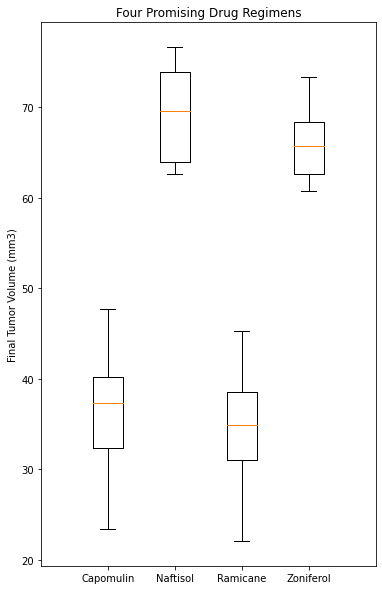

In [20]:
# Create box plots for Final Tumor Volume (mm3) for the Drug Regimens Capomulin, Naftisol, Ramicane, Zoniferol
four_promising_regimens = ([final_tumor_volume_Capomulin, final_tumor_volume_Naftisol, 
                            final_tumor_volume_Ramicane, final_tumor_volume_Zoniferol])

plt.figure(figsize=(6, 10))
plt.boxplot(x=four_promising_regimens, labels=("Capomulin","Naftisol","Ramicane","Zoniferol",), positions=[1, 1.5, 2, 2.5])
plt.title("Four Promising Drug Regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [21]:
# # Find Q1, Q3, IQR, minmum, and maximum for Capomulin, Naftisol, Ramicane, and Zoniferol combined
# q1 = np.quantile(final_tumor_volume_most_promising, q=[.25])[0]
# q3 = np.quantile(final_tumor_volume_most_promising, q=[.75])[0]
# iqr = q3 - q1
# iqr

# iqr_scipy = st.iqr(final_tumor_volume_most_promising)
# iqr_scipy

# minimum = q1 - (iqr * 1.5)
# minimum

# maximum = q3 + (iqr * 1.5)
# maximum

## Line and Scatter Plots

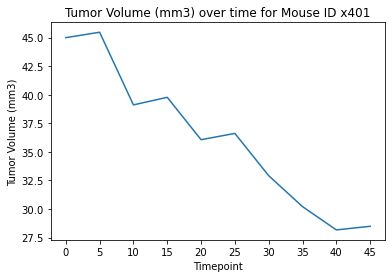

In [22]:
# Create dataframe for Drug Regimen Capomulin with columns Drug Regimen, Mouse ID, Timepoint, and Tumor Volume
tumor_volumes_Capomulin_df = (mouse_and_study_data_clean_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
                                .loc[mouse_and_study_data_clean_df["Drug Regimen"]=="Capomulin"])

# Filter down to Mouse ID x401
tumor_volumes_Capomulin_x401_df = tumor_volumes_Capomulin_df.loc[tumor_volumes_Capomulin_df["Mouse ID"]=="x401"]

# Extract tumor volumes for Mouse ID x401
tumor_volumes_x401_df = tumor_volumes_Capomulin_x401_df["Tumor Volume (mm3)"]

# Extract timepoints for Mouse ID x401
timepoints_x401_df = tumor_volumes_Capomulin_x401_df["Timepoint"]

# Plot tumor volume over time for Mouse ID x401
plt.plot(timepoints_x401_df, tumor_volumes_x401_df)
plt.xticks(ticks=timepoints_x401_df)
plt.title("Tumor Volume (mm3) over time for Mouse ID x401")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

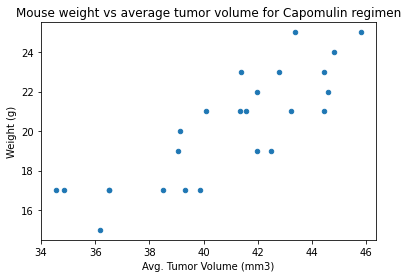

In [23]:
# Create dataframe for Drug Regimen Capomulin with columns Drug Regimen, Mouse ID, Weight (g), and Tumor Volume
tumor_volumes_and_weight_Capomulin_df = (mouse_and_study_data_clean_df[["Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
                                .loc[mouse_and_study_data_clean_df["Drug Regimen"]=="Capomulin"])

mouse_weight_Capomulin_df = tumor_volumes_and_weight_Capomulin_df[["Mouse ID", "Weight (g)"]].drop_duplicates("Mouse ID")
mouse_weight_Capomulin_df = mouse_weight_Capomulin_df.set_index("Mouse ID")

avg_tumor_volume_Capomulin_df = tumor_volumes_and_weight_Capomulin_df[["Mouse ID", "Tumor Volume (mm3)"]].groupby(["Mouse ID"]).mean()

avg_tumor_vol_and_mouse_weight_df = mouse_weight_Capomulin_df.merge(right=avg_tumor_volume_Capomulin_df, left_index=True, right_index=True, how="outer")
avg_tumor_vol_and_mouse_weight_df = avg_tumor_vol_and_mouse_weight_df.rename(columns={"Tumor Volume (mm3)" : "Avg. Tumor Volume (mm3)"})


avg_tumor_vol_vs_mouse_weight = avg_tumor_vol_and_mouse_weight_df.plot.scatter(x="Avg. Tumor Volume (mm3)", y="Weight (g)")
avg_tumor_vol_vs_mouse_weight.set(title="Mouse weight vs average tumor volume for Capomulin regimen")
plt.show()

## Correlation and Regression

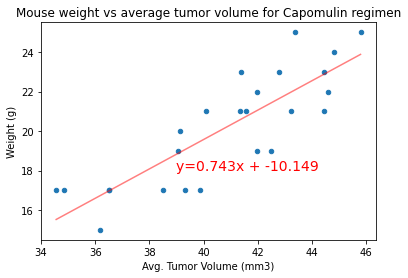

In [27]:
avg_tumor_vol_and_mouse_weight_sorted_df = avg_tumor_vol_and_mouse_weight_df.sort_values(by=["Avg. Tumor Volume (mm3)"], ascending=True)

avg_tumor_vol_Capomulin = avg_tumor_vol_and_mouse_weight_sorted_df["Avg. Tumor Volume (mm3)"]
avg_tumor_vol_Capomulin

mouse_weight_Capomulin = avg_tumor_vol_and_mouse_weight_sorted_df["Weight (g)"]
mouse_weight_Capomulin

avg_tumor_vol_vs_mouse_weight_regress = st.linregress(x=avg_tumor_vol_Capomulin, y=mouse_weight_Capomulin)

slope = round(avg_tumor_vol_vs_mouse_weight_regress.slope, 3)

y_intercept = round(avg_tumor_vol_vs_mouse_weight_regress.intercept, 3)

regression_y = []

for tumor_volume in avg_tumor_vol_Capomulin:
    y = (slope * tumor_volume) + y_intercept
    regression_y.append(y)

regression_y

avg_tumor_vol_vs_mouse_weight = avg_tumor_vol_and_mouse_weight_df.plot.scatter(x="Avg. Tumor Volume (mm3)", y="Weight (g)")
avg_tumor_vol_vs_mouse_weight.set(title="Mouse weight vs average tumor volume for Capomulin regimen")

# plt.annotate(text="Hello World!", xy=(40,22))

plt.plot(avg_tumor_vol_Capomulin, regression_y, color="red", alpha=.5)


plt.annotate(text=f"y={slope}x + {y_intercept}", xy=(39,18), fontsize=14, color="red")

plt.show()

